<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_4/Assignment_4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
Zachariah Freitas <br>
Date: 2020-10-01 <br>

In [2]:
# Install Book libraries.
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.0 MB/s 


In [3]:
# # Import required packages for this chapter

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

from dmba import plotDecisionTree, gainsChart, liftChart, classificationSummary, regressionSummary
from dmba.metric import AIC_score

%matplotlib inline

no display found. Using non-interactive Agg backend


In [4]:
# Export Data From Colab to Laptop.
# from google.colab import files
# scoreAnalysis.to_csv('filename.csv') 
# files.download('filename.csv')

## Question 1
**Data preparation:** Load the data and prepare it for predictive analysis.

In [5]:
# Dataset Sources
Fundraising = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_4/Assignment_4/Fundraising.csv'
FutureFundraising = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_4/Assignment_4/FutureFundraising.csv'

In [6]:
df = pd.read_csv(Fundraising)
df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [7]:
df_copy = df.copy()

df_copy.columns = [d.replace(' ', '_').replace('.', '') for d in df_copy.columns]
df_copy = df_copy.iloc[: , 2:]
# df_copy = df_copy.drop('TARGET_D', axis=1)
df_copy.head()

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,0,1,0,0,1,1,5,1,9,1399,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,1,0,0,0,1,1,1,0,7,698,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,0,0,0,1,0,2,5,1,8,828,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,0,0,0,1,1,1,3,0,4,1471,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,0,1,0,0,1,1,4,0,8,547,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [8]:
# separate target and predictors
y = df_copy['TARGET_B'].to_numpy()
X = df_copy.drop(['TARGET_B', 'TARGET_D'], axis=1)

# Standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

StandardScaler()

### Question 1.1 
Partition the dataset into 60% training and 40% validation (set the seed to 12345). (4 Points)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

# Normalize the data
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

---
**Answer:** <br>
Test/Train split code above.
---

## Question 2
**Model Building:** Follow the following steps to build, evaluate, and choose a model.

### Question 2.1
Select classification tool and parameters: Run at least two classification models of your choosing. Be sure NOT to use TARGET_D in your analysis. Describe the two models that you chose, with sufficient detail (method, parameters, variables, etc.) so that it can be replicated. (10 Points)


In [10]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

pred = rf.predict(X_test_norm)
classificationSummary(y_test, pred)

rf_proba = rf.predict_proba(X_test_norm)
rf_result = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in rf_proba],
                            'p(1)': [p[1] for p in rf_proba],
                            'predicted': rf.predict(X_test_norm)
                          })
rf_result = rf_result.sort_values(by=['p(1)'], ascending=False)

print('\nAIC', AIC_score(y_test, rf.predict(X_test_norm), df=len(X.columns) + 1), '\n')


Confusion Matrix (Accuracy 0.5329)

       Prediction
Actual   0   1
     0 345 293
     1 290 320

AIC 2635.8048463804203 



In [11]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_norm, y_train)

pred = knn.predict(X_test_norm)
    
classificationSummary(y_test, pred)

knn_proba = knn.predict_proba(X_test_norm)
knn_result = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in knn_proba],
                            'p(1)': [p[1] for p in knn_proba],
                            'predicted': knn.predict(X_test_norm)
                          })
knn_result = knn_result.sort_values(by=['p(1)'], ascending=False)

print('\nAIC', AIC_score(y_test, knn.predict(X_test_norm), df=len(X.columns) + 1), '\n')

Confusion Matrix (Accuracy 0.4888)

       Prediction
Actual   0   1
     0 297 341
     1 297 313

AIC 2748.3134154293034 



In [12]:
# Logistic regression model

lr = LogisticRegressionCV(penalty="l2", solver='liblinear')
lr.fit(X_train_norm, y_train)

pred = lr.predict(X_test_norm)
    
classificationSummary(y_test, pred)

lr_proba = lr.predict_proba(X_test_norm)
lr_result = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in lr_proba],
                            'p(1)': [p[1] for p in lr_proba],
                            'predicted': lr.predict(X_test_norm)
                          })
lr_result = lr_result.sort_values(by=['p(1)'], ascending=False)

print('regularization', lr.C_, '\n')
print('intercept ', lr.intercept_[0], '\n')

display(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns).transpose())

print('\nAIC', AIC_score(y_test, lr.predict(X_test_norm), df=len(X.columns) + 1), '\n')

Confusion Matrix (Accuracy 0.5657)

       Prediction
Actual   0   1
     0 343 295
     1 247 363
regularization [0.00077426] 

intercept  0.007239498102906967 



,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT
coeff,-0.000471,-0.017492,-0.003436,0.018853,0.021815,-0.015647,0.016994,0.017672,-0.003411,0.000186,-0.004512,-0.006432,0.006782,0.037655,0.010085,-0.010592,-0.023124,-0.059285,-0.000789,-0.030912



AIC 2544.7992076116843 



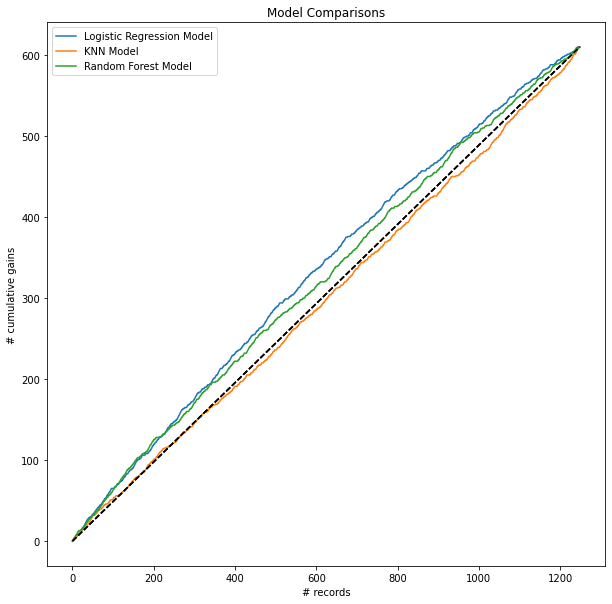

In [13]:
# Plot
ax = gainsChart(lr_result.actual, label='Logistic Regression Model', color='C0', figsize=[10, 10])
ax = gainsChart(knn_result.actual, label='KNN Model', color='C1', ax=ax)
ax = gainsChart(rf_result.actual, label='Random Forest Model', color='C2', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()

---
**Answer:** <br>
Because we are trying to model propensity to donate, I’ve chosen to try the following three models: Logistic Regression with regularization (LR), Random Forest (RF), and K Nearest Neighbors (KNN). For this initial modeling I’ve decided to normalize all of the features, mainly because of how important this is for KNN, but it could also be beneficial for our other models as well. I’ve also chosen regularized logistic regression and random forest for their built-in regularization capabilities. All features were used and default models setting were chosen.

---

### Question 2.2
Classification under asymmetric response and cost: What is the reasoning behind using weighted sampling to produce a training set with equal numbers of donors and non-donors? Why not use a simple random sample from the original dataset? (10
Points)


---
**Answer:** <br>

The purpose of doing classification under asymmetric response and cost is to for the model to discriminate between the classes using features rather than guess class assignment on classes with the most occurrences. It puts the importance of feature differentiation ahead of class weights.


---

### Question 2.3 
Calculate net profit: For each method, calculate the cumulative gains of net profit for both the training and validation sets based on the actual response rate (5.1%). Again, the expected donation, given that they are donors, is \$13.00, and the total cost of each mailing is \$0.68. (Hint: To calculate estimated net profit, we will need to undo the effects of the weighted sampling and calculate the net profit that would reflect the actual response distribution of 5.1% donors and 94.9% non-donors. To do this, divide each row’s net profit by the oversampling weights applicable to the actual status of that row. The oversampling weight for actual donors is 50%/5.1% = 9.8. The oversampling weight for actual non-donors is 50%/94.9% = 0.53). (10 Points)



In [14]:
def scoreAnalysis(df, model, response_rate = 0.051): # Dataframe, model, response_rate
  scoreAnalysis = df.copy()
  scoreAnalysis['purchaseProbability'] = model.predict_proba(X_test)
  scoreAnalysis['spendingPrediction'] = linear_model.predict(X_test)
  scoreAnalysis['adjustedSpendingPrediction'] = response_rate * scoreAnalysis['spendingPrediction']
  scoreAnalysis['expectedSpending'] = scoreAnalysis['purchaseProbability'] * scoreAnalysis['adjustedSpendingPrediction']
  return scoreAnalysis


In [15]:
rf_scoreAnalysis = scoreAnalysis()

TypeError: ignored

In [22]:
# Logistic Regression

def gains_data_prep(df_org, model, X=X, orig_response_rate = 0.051, new_rr = 0.5, avgRevenue = 13.0, avgCost = 0.68):
  X_norm = scaler.transform(X)
  proba = model.predict_proba(X_norm)
  result = pd.DataFrame({'actual': y.astype("int64"), 
                         'p(0)': [p[0] for p in proba],
                         'p(1)': [p[1] for p in proba],
                         'predicted': model.predict(X_norm)
                         })
  scoreAnalysis = df_org.join(result)
  avg_profit = avgRevenue - avgCost
  response_rate = orig_response_rate/new_rr
  rr = response_rate
  scoreAnalysis['donationProbability'] = model.predict_proba(X_norm)[:,1]
  scoreAnalysis['avg_profit'] = avg_profit 
  scoreAnalysis['adjustedSpendingPrediction'] = response_rate * scoreAnalysis['avg_profit']
  scoreAnalysis['expectedSpending'] = scoreAnalysis['donationProbability'] * scoreAnalysis['adjustedSpendingPrediction']
  return scoreAnalysis


lr_scoreAnalysis = gains_data_prep(df_copy, lr, X)
rf_scoreAnalysis = gains_data_prep(df_copy, rf, X)
knn_scoreAnalysis = gains_data_prep(df_copy, knn, X)

display(lr_scoreAnalysis)
display(rf_scoreAnalysis)
display(knn_scoreAnalysis)

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,TARGET_B,TARGET_D,actual,p(0),p(1),predicted,donationProbability,avg_profit,adjustedSpendingPrediction,expectedSpending
0,0,1,0,0,1,1,5,1,9,1399,...,1,5.0,1,0.477456,0.522544,1,0.522544,12.32,1.25664,0.656650
1,1,0,0,0,1,1,1,0,7,698,...,1,10.0,1,0.520185,0.479815,0,0.479815,12.32,1.25664,0.602954
2,0,0,0,1,0,2,5,1,8,828,...,1,5.0,1,0.492438,0.507562,1,0.507562,12.32,1.25664,0.637823
3,0,0,0,1,1,1,3,0,4,1471,...,0,0.0,0,0.464639,0.535361,1,0.535361,12.32,1.25664,0.672756
4,0,1,0,0,1,1,4,0,8,547,...,0,0.0,0,0.517937,0.482063,0,0.482063,12.32,1.25664,0.605780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0,0,0,1,1,1,4,0,8,697,...,0,0.0,0,0.487153,0.512847,1,0.512847,12.32,1.25664,0.644464
3116,0,1,0,0,0,1,2,0,8,590,...,1,40.0,1,0.588566,0.411434,0,0.411434,12.32,1.25664,0.517024
3117,0,0,0,1,1,1,3,0,7,3129,...,0,0.0,0,0.505082,0.494918,0,0.494918,12.32,1.25664,0.621933
3118,0,0,0,1,1,1,7,1,8,1345,...,0,0.0,0,0.500936,0.499064,0,0.499064,12.32,1.25664,0.627144


,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,TARGET_B,TARGET_D,actual,p(0),p(1),predicted,donationProbability,avg_profit,adjustedSpendingPrediction,expectedSpending
0,0,1,0,0,1,1,5,1,9,1399,...,1,5.0,1,0.27,0.73,1,0.73,12.32,1.25664,0.917347
1,1,0,0,0,1,1,1,0,7,698,...,1,10.0,1,0.61,0.39,0,0.39,12.32,1.25664,0.490090
2,0,0,0,1,0,2,5,1,8,828,...,1,5.0,1,0.37,0.63,1,0.63,12.32,1.25664,0.791683
3,0,0,0,1,1,1,3,0,4,1471,...,0,0.0,0,0.53,0.47,0,0.47,12.32,1.25664,0.590621
4,0,1,0,0,1,1,4,0,8,547,...,0,0.0,0,0.87,0.13,0,0.13,12.32,1.25664,0.163363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0,0,0,1,1,1,4,0,8,697,...,0,0.0,0,0.89,0.11,0,0.11,12.32,1.25664,0.138230
3116,0,1,0,0,0,1,2,0,8,590,...,1,40.0,1,0.66,0.34,0,0.34,12.32,1.25664,0.427258
3117,0,0,0,1,1,1,3,0,7,3129,...,0,0.0,0,0.52,0.48,0,0.48,12.32,1.25664,0.603187
3118,0,0,0,1,1,1,7,1,8,1345,...,0,0.0,0,0.88,0.12,0,0.12,12.32,1.25664,0.150797


,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner_dummy,NUMCHLD,INCOME,gender_dummy,WEALTH,HV,...,TARGET_B,TARGET_D,actual,p(0),p(1),predicted,donationProbability,avg_profit,adjustedSpendingPrediction,expectedSpending
0,0,1,0,0,1,1,5,1,9,1399,...,1,5.0,1,0.0,1.0,1,1.0,12.32,1.25664,1.25664
1,1,0,0,0,1,1,1,0,7,698,...,1,10.0,1,1.0,0.0,0,0.0,12.32,1.25664,0.00000
2,0,0,0,1,0,2,5,1,8,828,...,1,5.0,1,0.0,1.0,1,1.0,12.32,1.25664,1.25664
3,0,0,0,1,1,1,3,0,4,1471,...,0,0.0,0,1.0,0.0,0,0.0,12.32,1.25664,0.00000
4,0,1,0,0,1,1,4,0,8,547,...,0,0.0,0,1.0,0.0,0,0.0,12.32,1.25664,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0,0,0,1,1,1,4,0,8,697,...,0,0.0,0,1.0,0.0,0,0.0,12.32,1.25664,0.00000
3116,0,1,0,0,0,1,2,0,8,590,...,1,40.0,1,0.0,1.0,1,1.0,12.32,1.25664,1.25664
3117,0,0,0,1,1,1,3,0,7,3129,...,0,0.0,0,0.0,1.0,1,1.0,12.32,1.25664,1.25664
3118,0,0,0,1,1,1,7,1,8,1345,...,0,0.0,0,1.0,0.0,0,0.0,12.32,1.25664,0.00000


In [17]:

print(scoreAnalysis['avg_profit'].sum())
print(scoreAnalysis['adjustedSpendingPrediction'].sum())
print(scoreAnalysis['expectedSpending'].sum())

TypeError: ignored

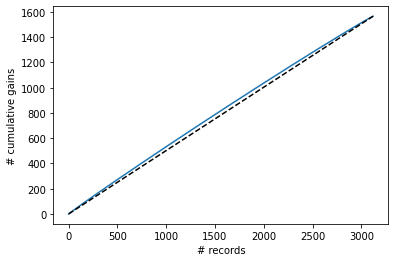

In [ ]:
full_result = scoreAnalysis.sort_values(by=['expectedSpending'], ascending=False)
gainsChart(full_result.donationProbability	)

In [ ]:
# Expected profit
averageSpending = scoreAnalysis['expectedSpending'].sum()
print('Average expected spending', averageSpending)


Average expected spending 1967.4764812545382


---
**Answer:** <br>

---

### Question 2.4
Draw cumulative gains curves: Draw the different models’ net profit cumulative gains curves for the validation set in a single plot (net profit on the y-axis, proportion of list or number mailed on the x-axis). Is there a model that dominates? (10 Points)


In [ ]:
# Plot
ax = gainsChart(lr_result.actual, label='Logistic Regression Model', color='C0', figsize=[10, 10])
ax = gainsChart(knn_result.actual, label='KNN Model', color='C1', ax=ax)
ax = gainsChart(rf_result.actual, label='Random Forest Model', color='C2', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()

---
**Answer:** <br>

---

### Question 2.5
Select the best model: From your answer in (4), what do you think is the “best” model? (12 Points)


---
**Answer:** <br>

---

## Question 3
**Testing:** The file FutureFundraising.csv contains the attributes for future mailing candidates.

### Question 3.1
Using your “best” model from Step 2 (number 5), which of these candidates do you predict as donors and non-donors? List them in descending order of the probability of being a donor. Starting at the top of this sorted list, roughly how far down would you go in a mailing campaign? (10 Points)


In [ ]:
mcmr = pd.DataFrame({'marginalRevenue': scoreAnalysis.sort_values(by=['expectedSpending'], ascending=False)['expectedSpending'].reset_index(drop=True)})
mcmr['marginalCosts'] = 0.68
mcmr['netProfit'] = mcmr['marginalRevenue'] - mcmr['marginalCosts']
mcmr['cumProfit'] = mcmr['netProfit'].cumsum()
mcmr


,marginalRevenue,marginalCosts,netProfit,cumProfit
0,0.776222,0.68,0.096222,0.096222
1,0.767367,0.68,0.087367,0.183589
2,0.764537,0.68,0.084537,0.268125
3,0.761629,0.68,0.081629,0.349755
4,0.755866,0.68,0.075866,0.425620
...,...,...,...,...
3115,0.467611,0.68,-0.212389,-153.062022
3116,0.428806,0.68,-0.251194,-153.313216
3117,0.424142,0.68,-0.255858,-153.569075
3118,0.413005,0.68,-0.266995,-153.836070


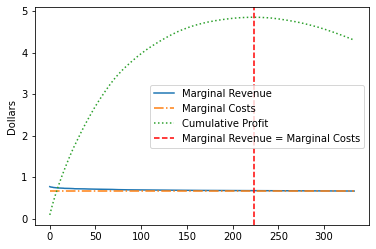

In [ ]:
profit_max = mcmr[mcmr['cumProfit'] == mcmr['cumProfit'].max()].index[0]

import matplotlib.pyplot as plt
plt.plot(mcmr['marginalRevenue'].head((profit_max*1.5).astype("int64"))
, label = "Marginal Revenue", linestyle="-")
plt.plot(mcmr['marginalCosts'].head((profit_max*1.5).astype("int64"))
, label = "Marginal Costs", linestyle="-.")
plt.plot(mcmr['cumProfit'].head((profit_max*1.5).astype("int64"))
, label = "Cumulative Profit", linestyle=":")
plt.ylabel('Dollars')
plt.axvline(x=profit_max,
            label = 'Marginal Revenue = Marginal Costs',
            color = 'red', linestyle="--")
plt.legend()
plt.show()

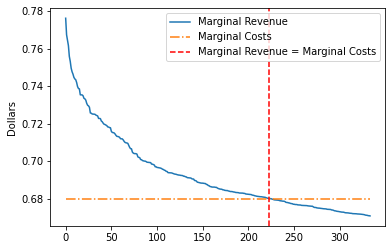

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mcmr['marginalRevenue'].head((profit_max*1.5).astype("int64"))
, label = "Marginal Revenue", linestyle="-")
plt.plot(mcmr['marginalCosts'].head((profit_max*1.5).astype("int64"))
, label = "Marginal Costs", linestyle="-.")
plt.ylabel('Dollars')
plt.axvline(x=profit_max,
            label = 'Marginal Revenue = Marginal Costs',
            color = 'red', linestyle="--")
plt.legend()
plt.show()

In [ ]:
# Profit Maximizing point
profit_max

223

---
**Answer:** <br>

Econ 101 says we will optimize profits when our marginal costs equals our marginal revenue. That being said, I would contact 223 prospects.

---

### Question 3.2
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (14 Points)

---
**Answer:** <br>

---